In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [3]:
# Directory where your data is located
base_dir = "D:/BC_ML/breast"

# Define image dimensions
img_height, img_width = 224, 224
batch_size = 32

# Data augmentation and preprocessing for training set
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # VGG16 preprocessing
    validation_split=0.2,  # 20% for validation
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # 'binary' for benign/malignant
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 6328 images belonging to 2 classes.
Found 1581 images belonging to 2 classes.


In [5]:
# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model (so that weights do not get updated during training)
base_model.trainable = False

# Add custom layers on top of VGG16
x = base_model.output
x = Flatten()(x)  # Flatten the output to a 1D vector
x = Dense(128, activation='relu')(x)  # Add a fully connected layer
x = Dense(64, activation='relu')(x)   # Another fully connected layer
predictions = Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [9]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [11]:
# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,934,401 (68.41 MB)

 Trainable params: 3,219,713 (12.28 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
# Load pre-trained VGG16 model without top layers
print("Loading VGG16 base model...")
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
print("VGG16 base model loaded.")

# Freeze the base model
base_model.trainable = False
print("Base model frozen.")

# Add custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Define final model
model = Model(inputs=base_model.input, outputs=predictions)
print("Custom layers added.")

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
print("Model compiled successfully.")

Loading VGG16 base model...
VGG16 base model loaded.
Base model frozen.
Custom layers added.
Model compiled successfully.


In [15]:
epochs = 5
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
)

Epoch 1/5


D:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


198/198 ━━━━━━━━━━━━━━━━━━━━ 855s 4s/step - accuracy: 0.7521 - loss: 0.8622 - val_accuracy: 0.7261 - val_loss: 0.7330
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 841s 4s/step - accuracy: 0.8814 - loss: 0.3141 - val_accuracy: 0.7204 - val_loss: 0.7545
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 819s 4s/step - accuracy: 0.8997 - loss: 0.2701 - val_accuracy: 0.6799 - val_loss: 0.7717
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 813s 4s/step - accuracy: 0.9032 - loss: 0.2550 - val_accuracy: 0.7287 - val_loss: 0.7555
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 817s 4s/step - accuracy: 0.9150 - loss: 0.2121 - val_accuracy: 0.7584 - val_loss: 0.8132


In [17]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

50/50 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.7538 - loss: 0.7334
Validation Accuracy: 75.52%


In [21]:
from tensorflow.keras.preprocessing import image

# Load a new image
img_path = r"D:\BC_ML\breast\benign\tubular_adenoma\SOB_B_TA-14-3411F-400-005.png"  # Path to a new image
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)

# Preprocess the image for VGG16
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
prediction = model.predict(img_array)

# Output the prediction
if prediction[0] > 0.5:
    print("Predicted Class: Malignant")
else:
    print("Predicted Class: Benign")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted Class: Benign


In [23]:
# Unfreeze some of the VGG16 layers for fine-tuning
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Continue training
history_fine = model.fit(
    train_generator,
    epochs=5,  # Add some more epochs
    validation_data=validation_generator
)

Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 949s 5s/step - accuracy: 0.9282 - loss: 0.1895 - val_accuracy: 0.7457 - val_loss: 0.7232
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 925s 5s/step - accuracy: 0.9365 - loss: 0.1718 - val_accuracy: 0.7755 - val_loss: 0.7252
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 915s 5s/step - accuracy: 0.9553 - loss: 0.1207 - val_accuracy: 0.7793 - val_loss: 0.7904
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 911s 5s/step - accuracy: 0.9660 - loss: 0.1083 - val_accuracy: 0.7742 - val_loss: 0.8377
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 919s 5s/step - accuracy: 0.9677 - loss: 0.0890 - val_accuracy: 0.7843 - val_loss: 0.7847


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from skimage.io import imread
import cv2 

In [27]:
import glob
import os

# Specify the path to your local directory where the images are stored
image_dir = r"D:\BC_ML\breast"

# Use glob to recursively find all PNG files in the directory and its subdirectories
images = glob.glob(os.path.join(image_dir, '**', '*.png'), recursive=True)

# Check the first image to make sure it works correctly
print(images[0])

# (Optional) You can also limit the number of images for testing purposes
# For example, to print the first 10 image paths:
print(images[:10])

D:\BC_ML\breast\benign\adenosis\SOB_B_A-14-22549AB-100-001.png
['D:\\BC_ML\\breast\\benign\\adenosis\\SOB_B_A-14-22549AB-100-001.png', 'D:\\BC_ML\\breast\\benign\\adenosis\\SOB_B_A-14-22549AB-100-002.png', 'D:\\BC_ML\\breast\\benign\\adenosis\\SOB_B_A-14-22549AB-100-003.png', 'D:\\BC_ML\\breast\\benign\\adenosis\\SOB_B_A-14-22549AB-100-004.png', 'D:\\BC_ML\\breast\\benign\\adenosis\\SOB_B_A-14-22549AB-100-005.png', 'D:\\BC_ML\\breast\\benign\\adenosis\\SOB_B_A-14-22549AB-100-006.png', 'D:\\BC_ML\\breast\\benign\\adenosis\\SOB_B_A-14-22549AB-100-007.png', 'D:\\BC_ML\\breast\\benign\\adenosis\\SOB_B_A-14-22549AB-100-008.png', 'D:\\BC_ML\\breast\\benign\\adenosis\\SOB_B_A-14-22549AB-100-009.png', 'D:\\BC_ML\\breast\\benign\\adenosis\\SOB_B_A-14-22549AB-100-010.png']


In [29]:
from PIL import Image

# Load the first image for example
image_path = images[7]
image = Image.open(image_path)

# Show the image
image.show()

# Optionally, resize or preprocess the image
image = image.resize((224, 224))  # Resize the image to (224x224) for model input
image = np.array(image)  # Convert to numpy array for further processing

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for training with some basic augmentations
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split for training/validation
)

# Create a data generator that loads images from the local directory
train_generator = datagen.flow_from_directory(
    image_dir,  # Path to the directory with images
    target_size=(224, 224),  # Resize images to 224x224 for the model
    batch_size=32,
    class_mode='categorical',  # Assuming multi-class classification
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    image_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 6328 images belonging to 2 classes.
Found 1581 images belonging to 2 classes.


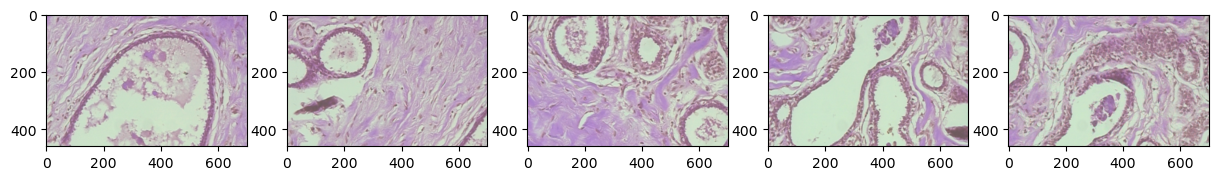

In [33]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  
for i in range(5):
    img = cv2.imread(images[i])
    axes[i].imshow(img)

In [35]:
df = pd.DataFrame(index=np.arange(0, len(images)), columns=["path", "target"])
for i in range(len(images)):
    df.loc[i, "path"] = images[i]
    df.loc[i, "target"] = int(images[i][-5])

In [37]:
df

,path,target
0,D:\BC_ML\breast\benign\adenosis\SOB_B_A-14-225...,1
1,D:\BC_ML\breast\benign\adenosis\SOB_B_A-14-225...,2
2,D:\BC_ML\breast\benign\adenosis\SOB_B_A-14-225...,3
3,D:\BC_ML\breast\benign\adenosis\SOB_B_A-14-225...,4
4,D:\BC_ML\breast\benign\adenosis\SOB_B_A-14-225...,5
...,...,...
7904,D:\BC_ML\breast\malignant\papillary_carcinoma\...,1
7905,D:\BC_ML\breast\malignant\papillary_carcinoma\...,2
7906,D:\BC_ML\breast\malignant\papillary_carcinoma\...,3
7907,D:\BC_ML\breast\malignant\papillary_carcinoma\...,4


In [41]:
pos = df[df.target==1]
neg = df[df.target==0]

pos.shape

(936, 2)

In [43]:
neg.shape

(644, 2)

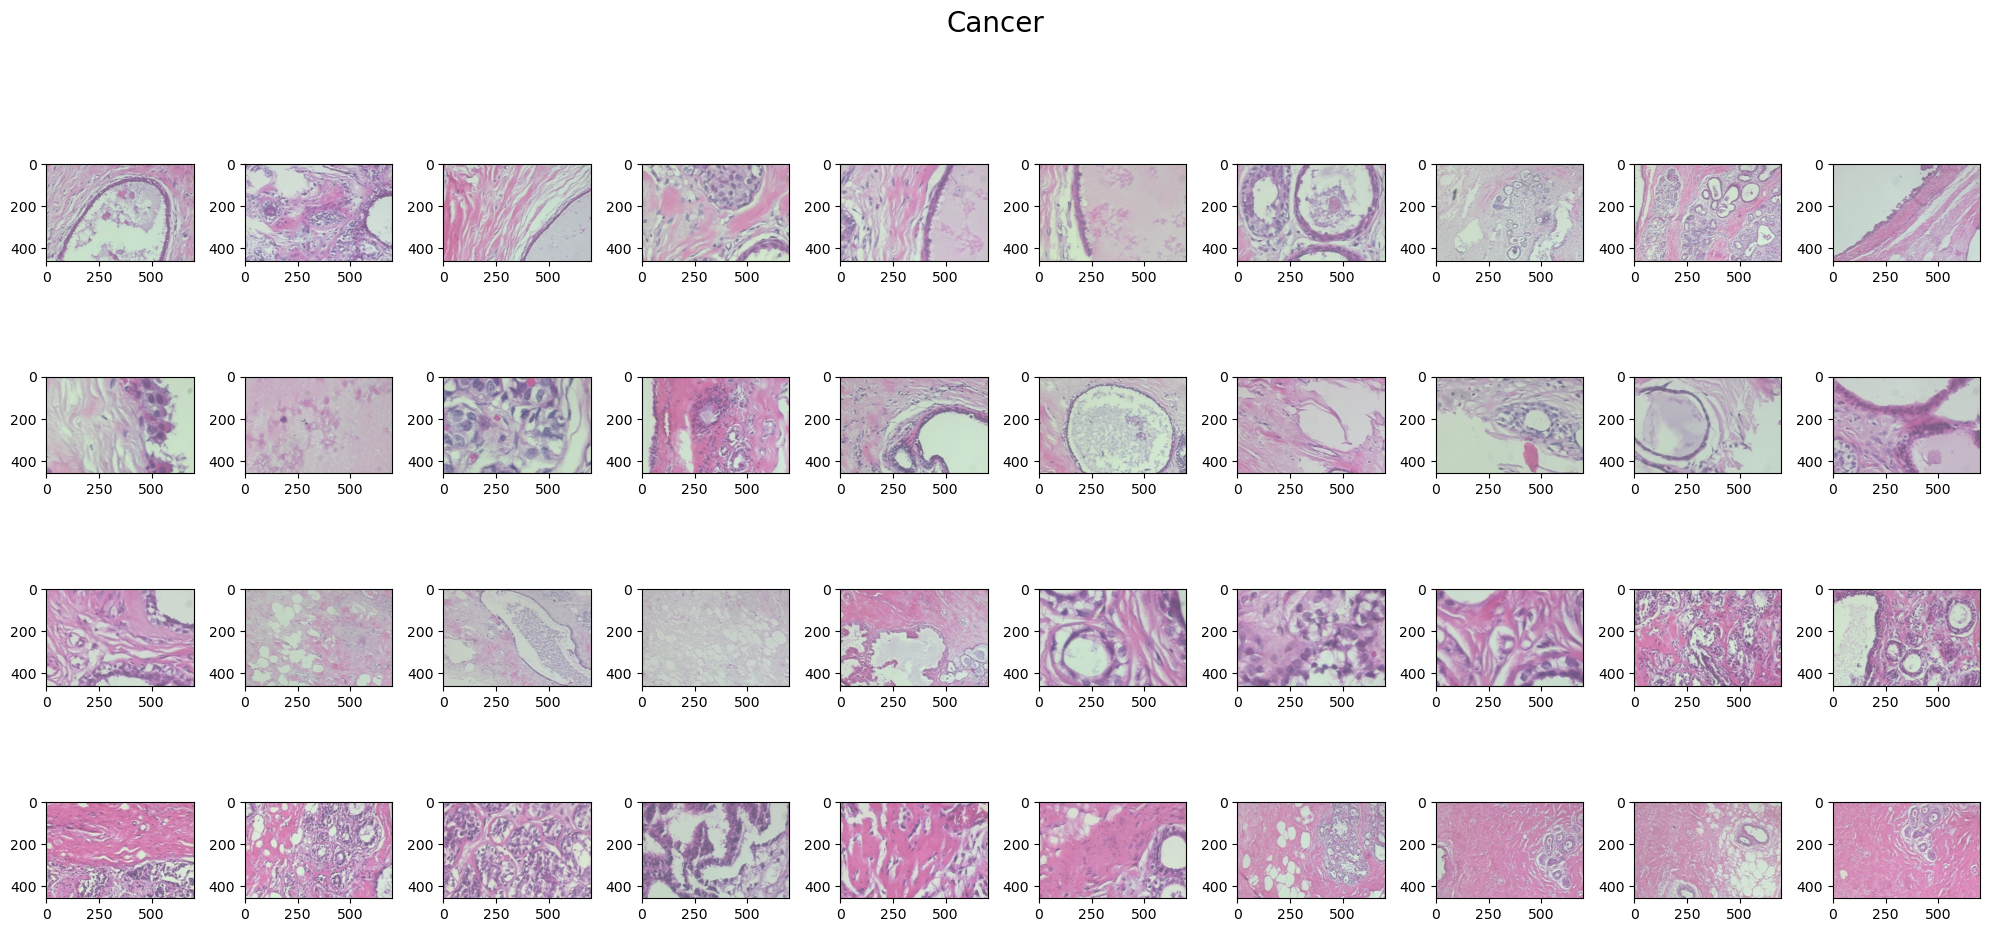

In [45]:
fig, axes = plt.subplots(4, 10, figsize=(20,10))
fig.suptitle('Cancer', fontsize=20)
for i in range(4):
    for j in range(10):        
        image = imread(pos.iloc[j + 10*i]["path"])
        axes[i,j].imshow(image)
plt.tight_layout(rect=[0, 0, 1, 0.96])

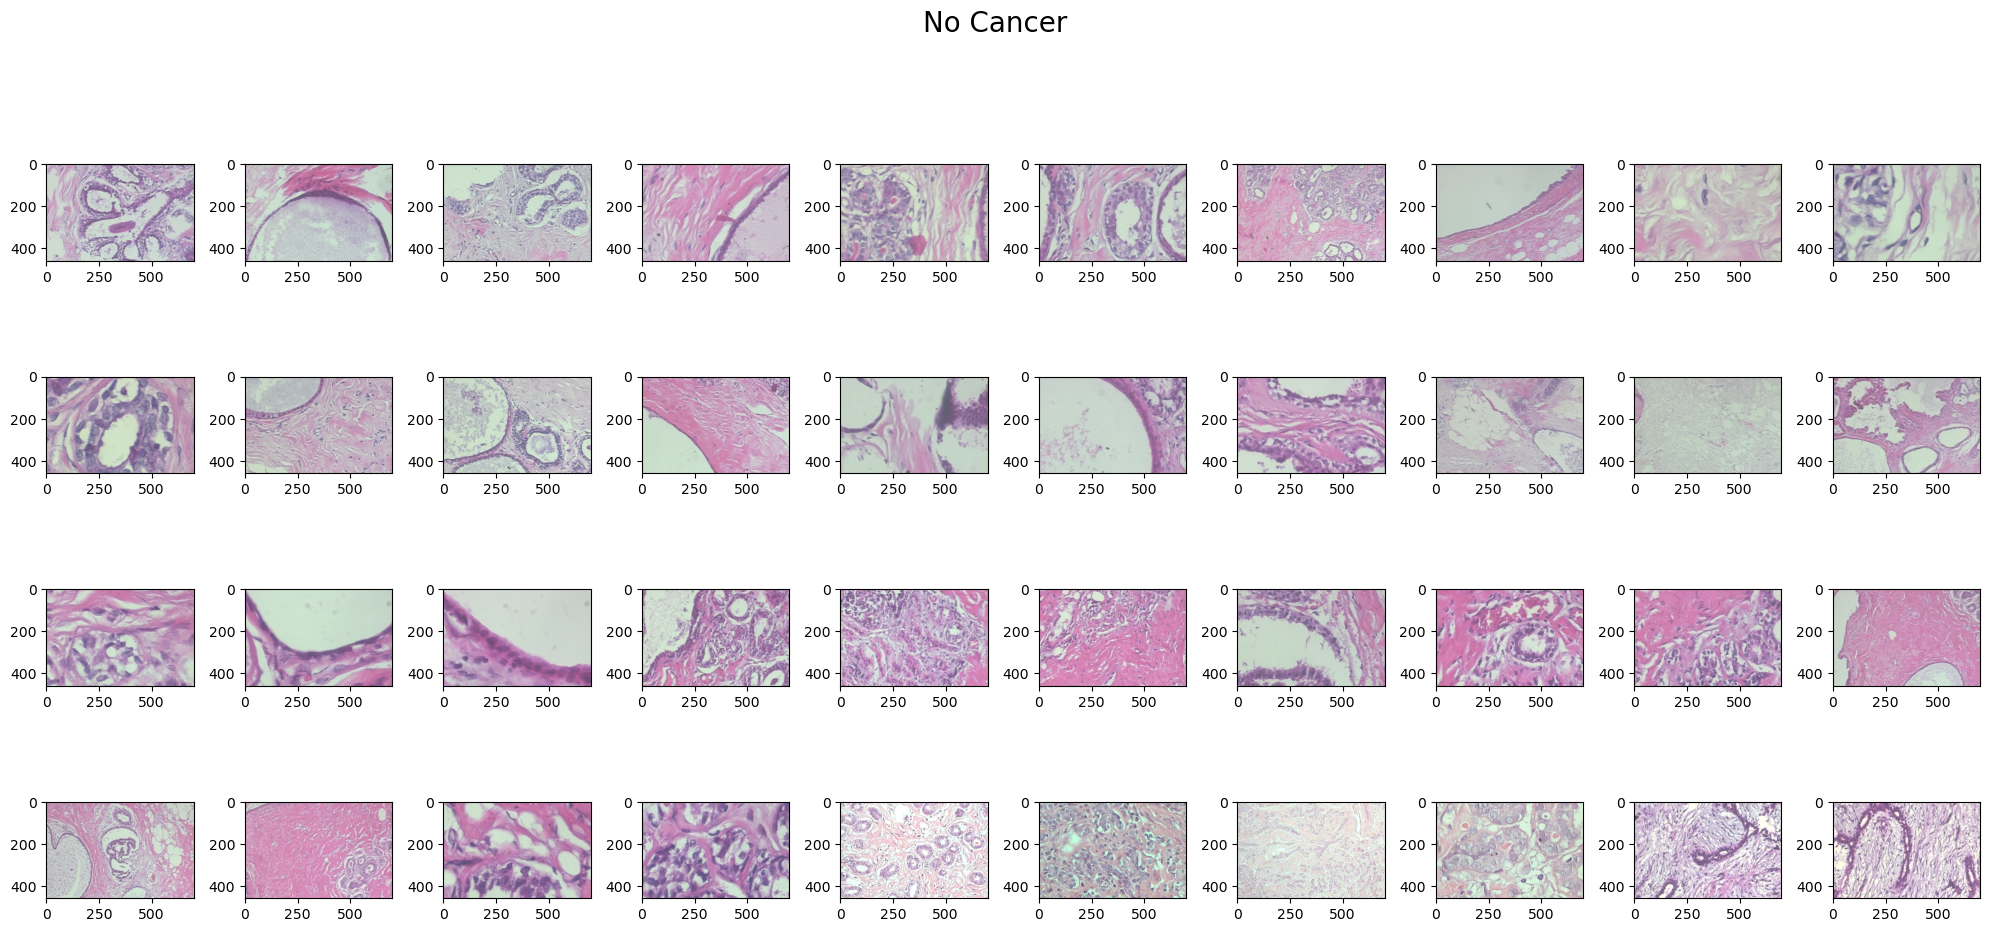

In [47]:
fig, axes = plt.subplots(4, 10, figsize=(20,10))
fig.suptitle('No Cancer', fontsize=20)
for i in range(4):
    for j in range(10):        
        image = imread(neg.iloc[j + 10*i]["path"])
        axes[i,j].imshow(image)
plt.tight_layout(rect=[0, 0, 1, 0.96])

In [49]:
from sklearn.utils import resample
pos_balanced = resample(pos,replace=True, n_samples=135000)  
df_balanced = pd.concat([neg, pos_balanced])
df_balanced.to_csv('balanced_dataframe.csv', index=False)
df_balanced

,path,target
9,D:\BC_ML\breast\benign\adenosis\SOB_B_A-14-225...,0
19,D:\BC_ML\breast\benign\adenosis\SOB_B_A-14-225...,0
29,D:\BC_ML\breast\benign\adenosis\SOB_B_A-14-225...,0
39,D:\BC_ML\breast\benign\adenosis\SOB_B_A-14-225...,0
49,D:\BC_ML\breast\benign\adenosis\SOB_B_A-14-225...,0
...,...,...
4485,D:\BC_ML\breast\malignant\ductal_carcinoma\SOB...,1
2988,D:\BC_ML\breast\malignant\ductal_carcinoma\SOB...,1
4923,D:\BC_ML\breast\malignant\ductal_carcinoma\SOB...,1
4090,D:\BC_ML\breast\malignant\ductal_carcinoma\SOB...,1


In [51]:
values = df_balanced.values
np.random.shuffle(values)
X = []
y = []
for feature, label in values:
    image = cv2.imread(feature, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (50, 50), interpolation = cv2.INTER_LINEAR)
    X.append(image)
    y.append(label)
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [53]:
print(f'Length of Training Data: {len(X_train)}')
print(f'Length of Testing Data: {len(X_test)}')

Length of Training Data: 108515
Length of Testing Data: 27129


In [15]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # For 5-grade classification
])

In [17]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)  # 5 output classes for grading

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers to retain pre-trained features
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.svm import SVC

# Define the CNN model using Functional API
inputs = Input(shape=(128, 128, 3))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(5, activation='softmax')(x)

# Create the model
cnn_model = Model(inputs=inputs, outputs=outputs)

# Compile the model (if you need to train it)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Generating some dummy data for training
# Assume we have 1000 training images of size (128, 128, 3)
train_images = np.random.rand(1000, 128, 128, 3)

# Assume we have labels for 5 classes, one-hot encoded
train_labels = np.random.randint(0, 5, size=(1000,))
train_labels = np.eye(5)[train_labels]  # One-hot encoding

# Extract features using the CNN model (up to the penultimate layer)
feature_extractor = Model(inputs=cnn_model.input, outputs=cnn_model.layers[-2].output)

# Get features for training data
features_train = feature_extractor.predict(train_images)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(features_train, np.argmax(train_labels, axis=1))

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step


SVC(kernel='linear')

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255)
train_images = datagen.flow_from_directory(r"D:/BC_ML/breast",
                                           target_size=(128, 128),
                                           batch_size=32,
                                           class_mode='categorical')

Found 7909 images belonging to 2 classes.


In [10]:
import pandas as pd

# Load dataset from a CSV file
data = pd.read_csv(r"D:\BC_ML\Folds.csv")

# If you want to separate features and labels (assuming your labels are in the last column)
X_train = data.iloc[:, :-1].values  # Features
y_train = data.iloc[:, -1].values  # Labels

In [12]:
import tensorflow as tf

# Load dataset from directories
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"D:\BC_ML\breast",
    image_size=(256, 256),  # Resize to required size
    batch_size=32,
    label_mode='int'  # Labels are integers (for classification)
)

# You can access the images and labels like this:
for images, labels in train_dataset.take(1):
    print(images.shape)  # (32, 256, 256, 3) for a batch of 32 images of size 256x256
    print(labels.shape)  # (32,) labels for 32 images

Found 7909 files belonging to 2 classes.
(32, 256, 256, 3)
(32,)


In [16]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define the main dataset directory (adjust this path)
main_dir = r'D:\\BC_ML\\breast'

# Define subdirectories for classes
subdirs = {
    'benign_grade1': 0,
    'benign_grade2': 1,
    'malignant_grade1': 2,
    'malignant_grade2': 3,
    'malignant_grade3': 4
}

# Prepare arrays for images and labels
train_images = []
train_labels = []

# Iterate through each subdirectory
for subdir, label in subdirs.items():
    subdir_path = os.path.join(main_dir, subdir)
    
    # Ensure it's a valid directory
    if os.path.isdir(subdir_path):
        for img_name in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, img_name)
            
            # Ensure it's a valid image file
            try:
                image = load_img(img_path, target_size=(256, 256))  # Load and resize image
                image = img_to_array(image)
                train_images.append(image)
                train_labels.append(label)  # Assign the corresponding label
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Optional: Print the shapes to confirm loading
print("Loaded images shape:", train_images.shape)
print("Loaded labels shape:", train_labels.shape)

# Convert labels to one-hot encoding
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=len(subdirs))

Loaded images shape: (0,)
Loaded labels shape: (0,)


In [18]:
import os

# Verify folder structure
main_dir = 'D:\\BC_ML\\breast'
subdirs = ['benign_grade1', 'benign_grade2', 'malignant_grade1', 'malignant_grade2', 'malignant_grade3']

for subdir in subdirs:
    subdir_path = os.path.join(main_dir, subdir)
    print(f"Checking directory: {subdir_path}")
    if not os.path.isdir(subdir_path):
        print(f"Directory not found: {subdir_path}")
    else:
        print(f"Files in {subdir}: {os.listdir(subdir_path)}")

Checking directory: D:\BC_ML\breast\benign_grade1
Directory not found: D:\BC_ML\breast\benign_grade1
Checking directory: D:\BC_ML\breast\benign_grade2
Directory not found: D:\BC_ML\breast\benign_grade2
Checking directory: D:\BC_ML\breast\malignant_grade1
Directory not found: D:\BC_ML\breast\malignant_grade1
Checking directory: D:\BC_ML\breast\malignant_grade2
Directory not found: D:\BC_ML\breast\malignant_grade2
Checking directory: D:\BC_ML\breast\malignant_grade3
Directory not found: D:\BC_ML\breast\malignant_grade3


In [22]:
import os

main_dir = 'D:\\BC_ML\\breast'

# List the contents of the main directory to see the actual subfolders
print("Contents of the main directory:")
print(os.listdir(main_dir))

Contents of the main directory:
['benign', 'count_files.sh', 'malignant', 'README.txt']


In [28]:
benign_dir = os.path.join(main_dir, 'benign')
malignant_dir = os.path.join(main_dir, 'malignant')

print("Contents of 'benign' directory:")
print(os.listdir(benign_dir))

print("Contents of 'malignant' directory:")
print(os.listdir(malignant_dir))

Contents of 'benign' directory:
['adenosis', 'adenosis.stat.txt', 'fibroadenoma', 'fibroadenoma.stat.txt', 'phyllodes_tumor', 'phyllodes_tumor.stat.txt', 'process_db_stat.py', 'README_B.txt', 'tubular_adenoma', 'tubular_adenoma.stat.txt']
Contents of 'malignant' directory:
['ductal_carcinoma', 'ductal_carcinoma.stat.txt', 'ductal_carcinoma.stat.txt.SOB', 'lobular_carcinoma', 'lobular_carcinoma.stat.txt', 'mucinous_carcinoma', 'mucinous_carcinoma.stat.txt', 'papillary_carcinoma', 'papillary_carcinoma.stat.txt', 'process_db_stat.py']


In [30]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define the main dataset directory
main_dir = 'D:\\BC_ML\\breast'

# Define subdirectories for classes
subdirs = {
    'benign/adenosis': 0,
    'benign/fibroadenoma': 1,
    'benign/phyllodes_tumor': 2,
    'benign/tubular_adenoma': 3,
    'malignant/ductal_carcinoma': 4,
    'malignant/lobular_carcinoma': 5,
    'malignant/mucinous_carcinoma': 6,
    'malignant/papillary_carcinoma': 7
}

# Prepare arrays for images and labels
train_images = []
train_labels = []

# Supported image extensions
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']

# Iterate through each subdirectory
for subdir, label in subdirs.items():
    subdir_path = os.path.join(main_dir, subdir)
    
    # Ensure it's a valid directory
    if os.path.isdir(subdir_path):
        print(f"Processing directory: {subdir_path}")
        for img_name in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, img_name)
            
            # Check if the file is an image based on its extension
            if any(img_name.lower().endswith(ext) for ext in image_extensions):
                try:
                    image = load_img(img_path, target_size=(256, 256))  # Load and resize image
                    image = img_to_array(image)
                    train_images.append(image)
                    train_labels.append(label)  # Assign the corresponding label
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")
            else:
                print(f"Skipped non-image file: {img_path}")

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Optional: Print the shapes to confirm loading
print("Loaded images shape:", train_images.shape)
print("Loaded labels shape:", train_labels.shape)

# Convert labels to one-hot encoding
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=len(subdirs))

Processing directory: D:\BC_ML\breast\benign/adenosis
Processing directory: D:\BC_ML\breast\benign/fibroadenoma
Processing directory: D:\BC_ML\breast\benign/phyllodes_tumor
Processing directory: D:\BC_ML\breast\benign/tubular_adenoma
Processing directory: D:\BC_ML\breast\malignant/ductal_carcinoma
Processing directory: D:\BC_ML\breast\malignant/lobular_carcinoma
Processing directory: D:\BC_ML\breast\malignant/mucinous_carcinoma
Processing directory: D:\BC_ML\breast\malignant/papillary_carcinoma
Loaded images shape: (7909, 256, 256, 3)
Loaded labels shape: (7909,)


In [32]:
unique, counts = np.unique(train_labels, return_counts=True)
print("Class distribution:")
print(dict(zip(unique, counts)))

Class distribution:
{0.0: 55363, 1.0: 7909}


In [36]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Normalize the images (convert values from [0, 255] to [0, 1])
train_images = train_images.astype('float32') / 255.0

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Convert labels to categorical (one-hot encoding) for 8 classes
num_classes = 8
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Build the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and fully connected layers
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer for 8 classes (4 benign + 4 malignant)
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model architecture
model.summary()

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,648 (56.64 MB)

 Trainable params: 14,848,200 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [42]:
print("Shape of labels before encoding:", train_labels.shape)
y_train = to_categorical(train_labels, num_classes)
print("Shape of labels after encoding:", y_train.shape)

Shape of labels before encoding: (7909, 8)
Shape of labels after encoding: (7909, 8, 8)


In [2]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define directories
main_dir = r'D:\\BC_ML\\breast'
benign_dir = os.path.join(main_dir, 'benign')
malignant_dir = os.path.join(main_dir, 'malignant')

# Load images and labels
def load_images_and_labels(benign_dir, malignant_dir):
    images = []
    labels = []
    
    # Load benign images
    for subfolder in os.listdir(benign_dir):
        subfolder_path = os.path.join(benign_dir, subfolder)
        if os.path.isdir(subfolder_path):
            print(f"Processing benign subfolder: {subfolder_path}")
            for img_name in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, img_name)
                try:
                    image = load_img(img_path, target_size=(256, 256))  # Load and resize image
                    image = img_to_array(image)
                    images.append(image)
                    labels.append(subfolder)  # Use subfolder name as label
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

    # Load malignant images
    for subfolder in os.listdir(malignant_dir):
        subfolder_path = os.path.join(malignant_dir, subfolder)
        if os.path.isdir(subfolder_path):
            print(f"Processing malignant subfolder: {subfolder_path}")
            for img_name in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, img_name)
                try:
                    image = load_img(img_path, target_size=(256, 256))  # Load and resize image
                    image = img_to_array(image)
                    images.append(image)
                    labels.append(subfolder)  # Use subfolder name as label
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    
    return np.array(images), np.array(labels)

# Load the images and labels
train_images, train_labels = load_images_and_labels(benign_dir, malignant_dir)

# Check if any images were loaded
if len(train_images) == 0:
    raise ValueError("No images were loaded. Please check the directories.")

# Normalize the images
train_images = train_images.astype('float32') / 255.0

# Encode the labels
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Convert labels to categorical
num_classes = len(np.unique(train_labels))  # Assuming the labels are from 0 to num_classes-1
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

# Build a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can train the model
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Processing benign subfolder: D:\\BC_ML\\breast\benign\adenosis
Processing benign subfolder: D:\\BC_ML\\breast\benign\fibroadenoma
Processing benign subfolder: D:\\BC_ML\\breast\benign\phyllodes_tumor
Processing benign subfolder: D:\\BC_ML\\breast\benign\tubular_adenoma
Processing malignant subfolder: D:\\BC_ML\\breast\malignant\ductal_carcinoma
Processing malignant subfolder: D:\\BC_ML\\breast\malignant\lobular_carcinoma
Processing malignant subfolder: D:\\BC_ML\\breast\malignant\mucinous_carcinoma
Processing malignant subfolder: D:\\BC_ML\\breast\malignant\papillary_carcinoma


D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 120s 582ms/step - accuracy: 0.4104 - loss: 3.7939 - val_accuracy: 0.4583 - val_loss: 1.7287
Epoch 2/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 100s 503ms/step - accuracy: 0.4552 - loss: 1.6323 - val_accuracy: 0.4690 - val_loss: 1.6200
Epoch 3/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 97s 488ms/step - accuracy: 0.4807 - loss: 1.5508 - val_accuracy: 0.4595 - val_loss: 1.6282
Epoch 4/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 93s 469ms/step - accuracy: 0.4937 - loss: 1.4316 - val_accuracy: 0.4741 - val_loss: 1.5128
Epoch 5/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 94s 474ms/step - accuracy: 0.5582 - loss: 1.2279 - val_accuracy: 0.4741 - val_loss: 1.5065
Epoch 6/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 94s 473ms/step - accuracy: 0.6231 - loss: 1.0641 - val_accuracy: 0.4722 - val_loss: 1.7567
Epoch 7/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 93s 470ms/step - accuracy: 0.7089 - loss: 0.8346 - val_accuracy: 0.4564 - val_loss: 1.8653
Epoch 8/25
198/198 ━━━━━━━━━━━━━━━━━━━━ 95s 478ms/step - accuracy: 0.8158 - loss:

In [4]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f'Validation accuracy: {val_accuracy*100:.2f}%')

50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.4408 - loss: 4.7261
Validation accuracy: 43.11%


In [112]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the new image (adjust the file path as needed)
image_path = r"D:\BC_ML\breast\benign\tubular_adenoma\SOB_B_TA-14-16184-200-015.png"  # Replace with the correct path to your image
new_image = load_img(image_path, target_size=(256, 256))  # Load and resize to match input shape
new_image = img_to_array(new_image)  # Convert the loaded image to an array

# Preprocess the image (apply the same preprocessing as used in training)
new_image = new_image / 255.0  # Example: scaling pixel values between 0 and 1

# Add batch dimension
new_image = np.expand_dims(new_image, axis=0)

# Predict the class
prediction = model.predict(new_image)

# Get the predicted class (0 to 7, where each number corresponds to a subclass)
predicted_class = np.argmax(prediction)
print(f"Predicted class index: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class index: 6


In [114]:
class_names = {
    0: 'benign/adenosis_grade_1',
    1: 'benign/adenosis_grade_2',
    2: 'benign/fibroadenoma_grade_1',
    3: 'benign/fibroadenoma_grade_2',
    4: 'benign/phyllodes_tumor_grade_1',
    5: 'benign/phyllodes_tumor_grade_2',
    6: 'benign/tubular_adenoma_grade_1',
    7: 'benign/tubular_adenoma_grade_2',
    8: 'malignant/ductal_carcinoma_grade_1',
    9: 'malignant/ductal_carcinoma_grade_2',
    10: 'malignant/ductal_carcinoma_grade_3',
    11: 'malignant/lobular_carcinoma_grade_1',
    12: 'malignant/lobular_carcinoma_grade_2',
    13: 'malignant/lobular_carcinoma_grade_3',
    14: 'malignant/mucinous_carcinoma_grade_1',
    15: 'malignant/mucinous_carcinoma_grade_2',
    16: 'malignant/mucinous_carcinoma_grade_3',
    17: 'malignant/papillary_carcinoma_grade_1',
    18: 'malignant/papillary_carcinoma_grade_2',
    19: 'malignant/papillary_carcinoma_grade_3'
}

In [116]:
# Number of classes
num_classes = 20

# Modify the final layer to output 20 classes
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [118]:
# Predict
predicted_class = np.argmax(model.predict(new_image), axis=-1)

# Output the predicted subclass and grade
print(f"Predicted subclass and grade: {class_names[predicted_class[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Predicted subclass and grade: malignant/lobular_carcinoma_grade_3
